In [75]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import parallel_coordinates

In [76]:
personalities_path = "../data/personalities.csv"
personalities_df = pd.read_csv(personalities_path)
removed_features = ["recordings", "Extraversion_bin", "Agreeableness_bin", "Conscientiousness_bin", "Emotional Stability_bin", "Openness_bin"]
personalities_df = personalities_df.drop(columns=removed_features)
# personalities_df = personalities_df.drop_duplicates(subset='participants')


In [77]:
personalities_df

,participants,Extraversion,Agreeableness,Conscientiousness,Emotional Stability,Openness
0,0.0,5.4,5.9,5.2,5.1,5.2
1,0.0,5.4,5.9,5.2,5.1,5.2
2,0.0,5.4,5.9,5.2,5.1,5.2
3,0.0,5.4,5.9,5.2,5.1,5.2
4,0.0,5.4,5.9,5.2,5.1,5.2
...,...,...,...,...,...,...
2083,57.0,4.6,6.5,5.1,4.6,6.6
2084,57.0,4.6,6.5,5.1,4.6,6.6
2085,57.0,4.6,6.5,5.1,4.6,6.6
2086,57.0,4.6,6.5,5.1,4.6,6.6


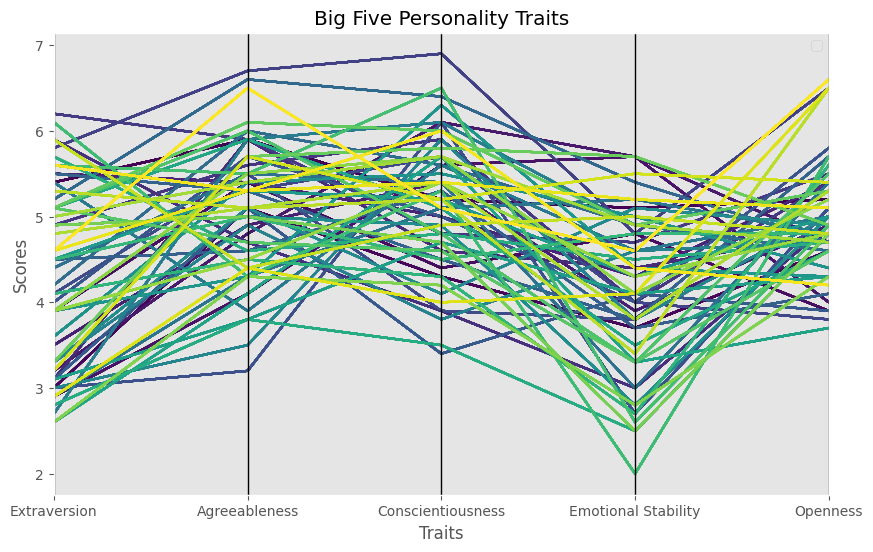

In [78]:
plt.figure(figsize=(10, 6))
parallel_coordinates(personalities_df, "participants", colormap='viridis')
plt.title('Big Five Personality Traits')
plt.xlabel('Traits')
plt.ylabel('Scores')
plt.legend([])
plt.show()


# showing distributions

In [79]:
# Describe Personality so we can bin them 
personalities_df = personalities_df.astype(float)
personalities_df.describe()

,participants,Extraversion,Agreeableness,Conscientiousness,Emotional Stability,Openness
count,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000
mean,28.500000,4.306897,5.091379,5.144828,4.137931,4.953448
std,16.744679,1.069233,0.758875,0.768562,0.909903,0.642406
min,0.000000,2.600000,3.200000,3.400000,2.000000,3.700000
25%,14.000000,3.200000,4.500000,4.600000,3.500000,4.600000
50%,28.500000,4.450000,5.100000,5.200000,4.200000,4.900000
75%,43.000000,5.200000,5.600000,5.700000,4.900000,5.300000
max,57.000000,6.200000,6.700000,6.900000,5.700000,6.600000


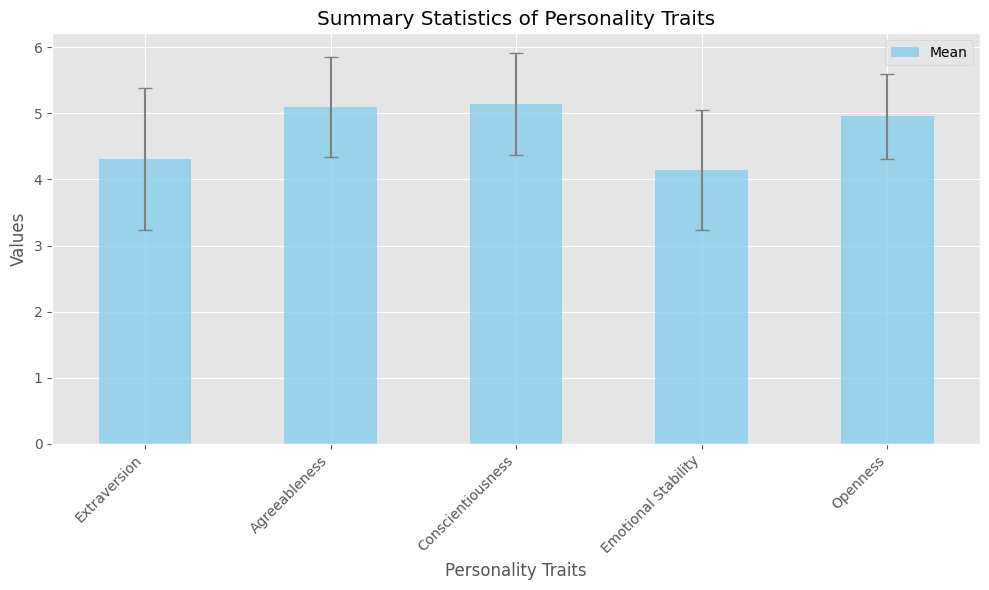

In [80]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming personalities_df.describe() contains the summary statistics
# Transpose the DataFrame for easier plotting
summary_stats = personalities_df.describe().drop(columns=["participants"]).T

# Customize plot style to 'ggplot'
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))

# Plot the mean values
mean_plot = summary_stats['mean'].plot(kind='bar', color='skyblue', alpha=0.8, label='Mean')
# Add error bars for standard deviation
plt.errorbar(x=summary_stats.index, y=summary_stats['mean'], yerr=summary_stats['std'], fmt='none', ecolor='gray', capsize=5)

# Set labels and title
plt.xlabel('Personality Traits')
plt.ylabel('Values')
plt.title('Summary Statistics of Personality Traits')

# Add legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Save the plot as an image for your research paper (optional)
# plt.savefig('summary_statistics_plot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()



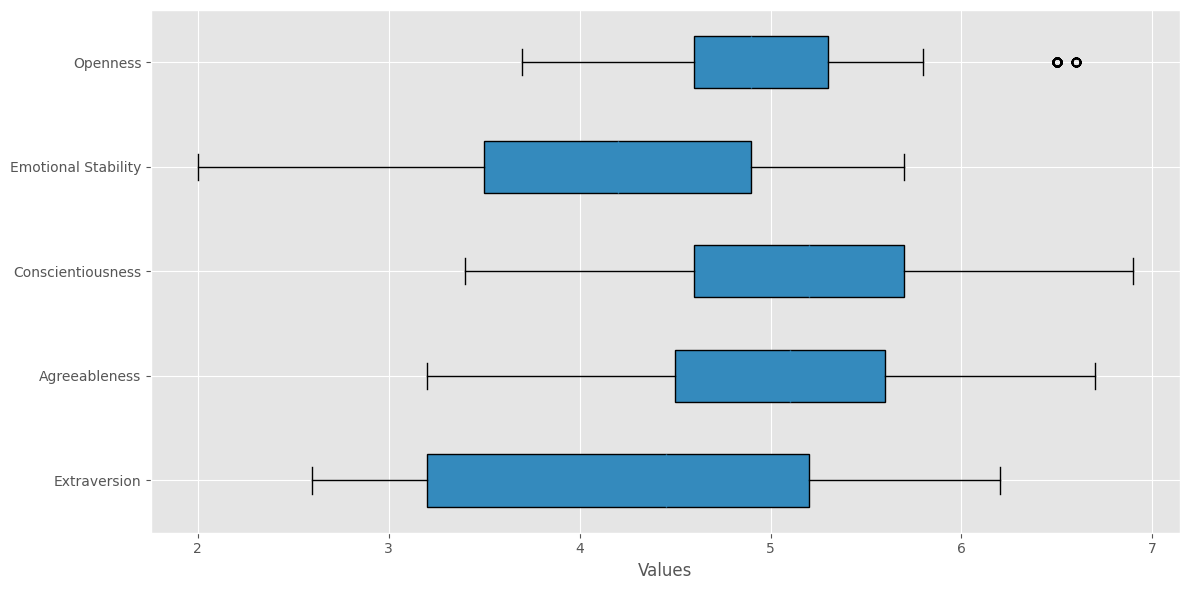

In [81]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming personalities_df is your DataFrame with personality traits
plt.figure(figsize=(12, 6))
personalities_df = personalities_df.drop(columns=["participants"])


# Create a grouped box plot for all features
box_data = [personalities_df[col] for col in personalities_df.columns]
plt.boxplot(box_data, vert=False, patch_artist=True, widths=0.5)

# Set labels for each feature
feature_labels = personalities_df.columns
plt.yticks(range(1, len(feature_labels) + 1), feature_labels)

# Set labels and title
plt.xlabel('Values')

plt.savefig('figures/box_plot_personality_traits.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()


ValueError: x and y must have same first dimension, but have shapes (6,) and (2089,)

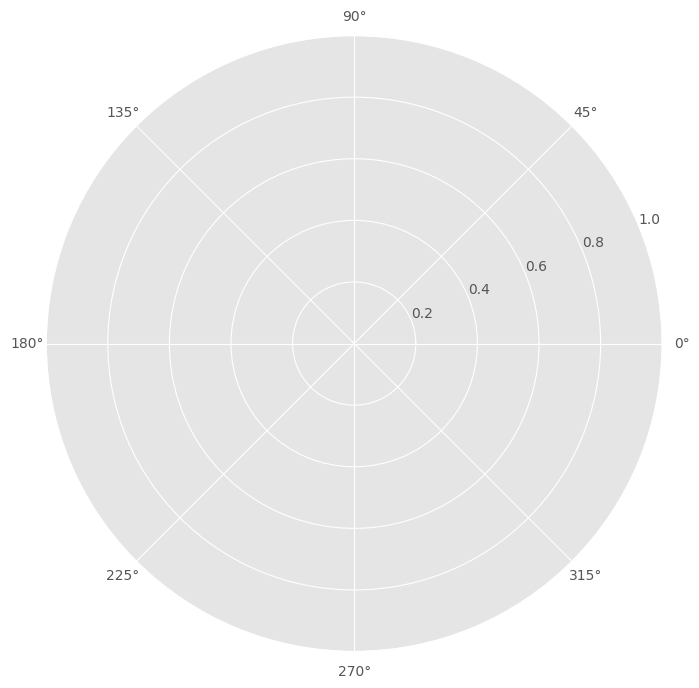

In [65]:
from math import pi
import numpy as np

personalities_path = "../data/personalities.csv"
personalities_df = pd.read_csv(personalities_path)
removed_features = ["participants", "recordings", "Extraversion_bin", "Agreeableness_bin", "Conscientiousness_bin", "Emotional Stability_bin", "Openness_bin"]
personalities_df = personalities_df.drop(columns=removed_features)
personality_traits = personalities_df.columns
data = personalities_df.values

fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Define angles and values for the radar chart
angles = np.linspace(0, 2 * np.pi, len(personality_traits), endpoint=False).tolist()
angles += angles[:1]  # To close the chart
max_value = 7  # Change this value according to your data range

# Plot the data
for i, trait in enumerate(personality_traits):
    trait_scores = data[:, i]
    trait_scores = np.append(trait_scores, trait_scores[0])  # To close the shape
    ax.fill(angles, trait_scores, alpha=0.25, label=trait)

# Customize the plot
ax.set_xticks(angles[:-1])
ax.set_xticklabels(personality_traits)
ax.set_yticklabels([])
ax.set_title('Big Six Personality Traits - Radar Chart')
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the plot
plt.show()

In [64]:
personalities_df.values

array([[5.4, 5.9, 5.2, 5.1, 5.2],
       [5.4, 5.9, 5.2, 5.1, 5.2],
       [5.4, 5.9, 5.2, 5.1, 5.2],
       ...,
       [4.6, 6.5, 5.1, 4.6, 6.6],
       [4.6, 6.5, 5.1, 4.6, 6.6],
       [4.6, 6.5, 5.1, 4.6, 6.6]])